# Comparing atmoshpheric circulation anomalies under different external forcing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
import xarray as xr
from scipy.stats import linregress
from warnings import simplefilter
import scikits.bootstrap as bootstraps
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
domain_lonlat = {
    'EAS':{'lon_min':90,'lon_max':130,'lat_min':30,'lat_max':60},
    'EU':{'lon_min':10,'lon_max':50,'lat_min':35,'lat_max':65},
    'WNA':{'lon_min':220,'lon_max':260,'lat_min':25,'lat_max':55},
}
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/figure_res/'

In [3]:
def get_cmip_sig(anomaly_df):
    cmip_num = len(anomaly_df['Dataset_run'])
    anomaly_mean = anomaly_df.mean(dim='Dataset_run')
    ano_cmip_sig_pos = (anomaly_mean > 0) * (anomaly_df > 0)
    ano_cmip_sig_neg = (anomaly_mean < 0) * (anomaly_df < 0)
    ano_cmip_sig_pos_num = ano_cmip_sig_pos.sum(dim='Dataset_run')
    ano_cmip_sig_neg_num = ano_cmip_sig_neg.sum(dim='Dataset_run')
    pos_sig = ano_cmip_sig_pos_num > cmip_num * 0.8
    neg_sig = ano_cmip_sig_neg_num > cmip_num * 0.8
    sig = pos_sig * 1 + neg_sig * 1
    return sig

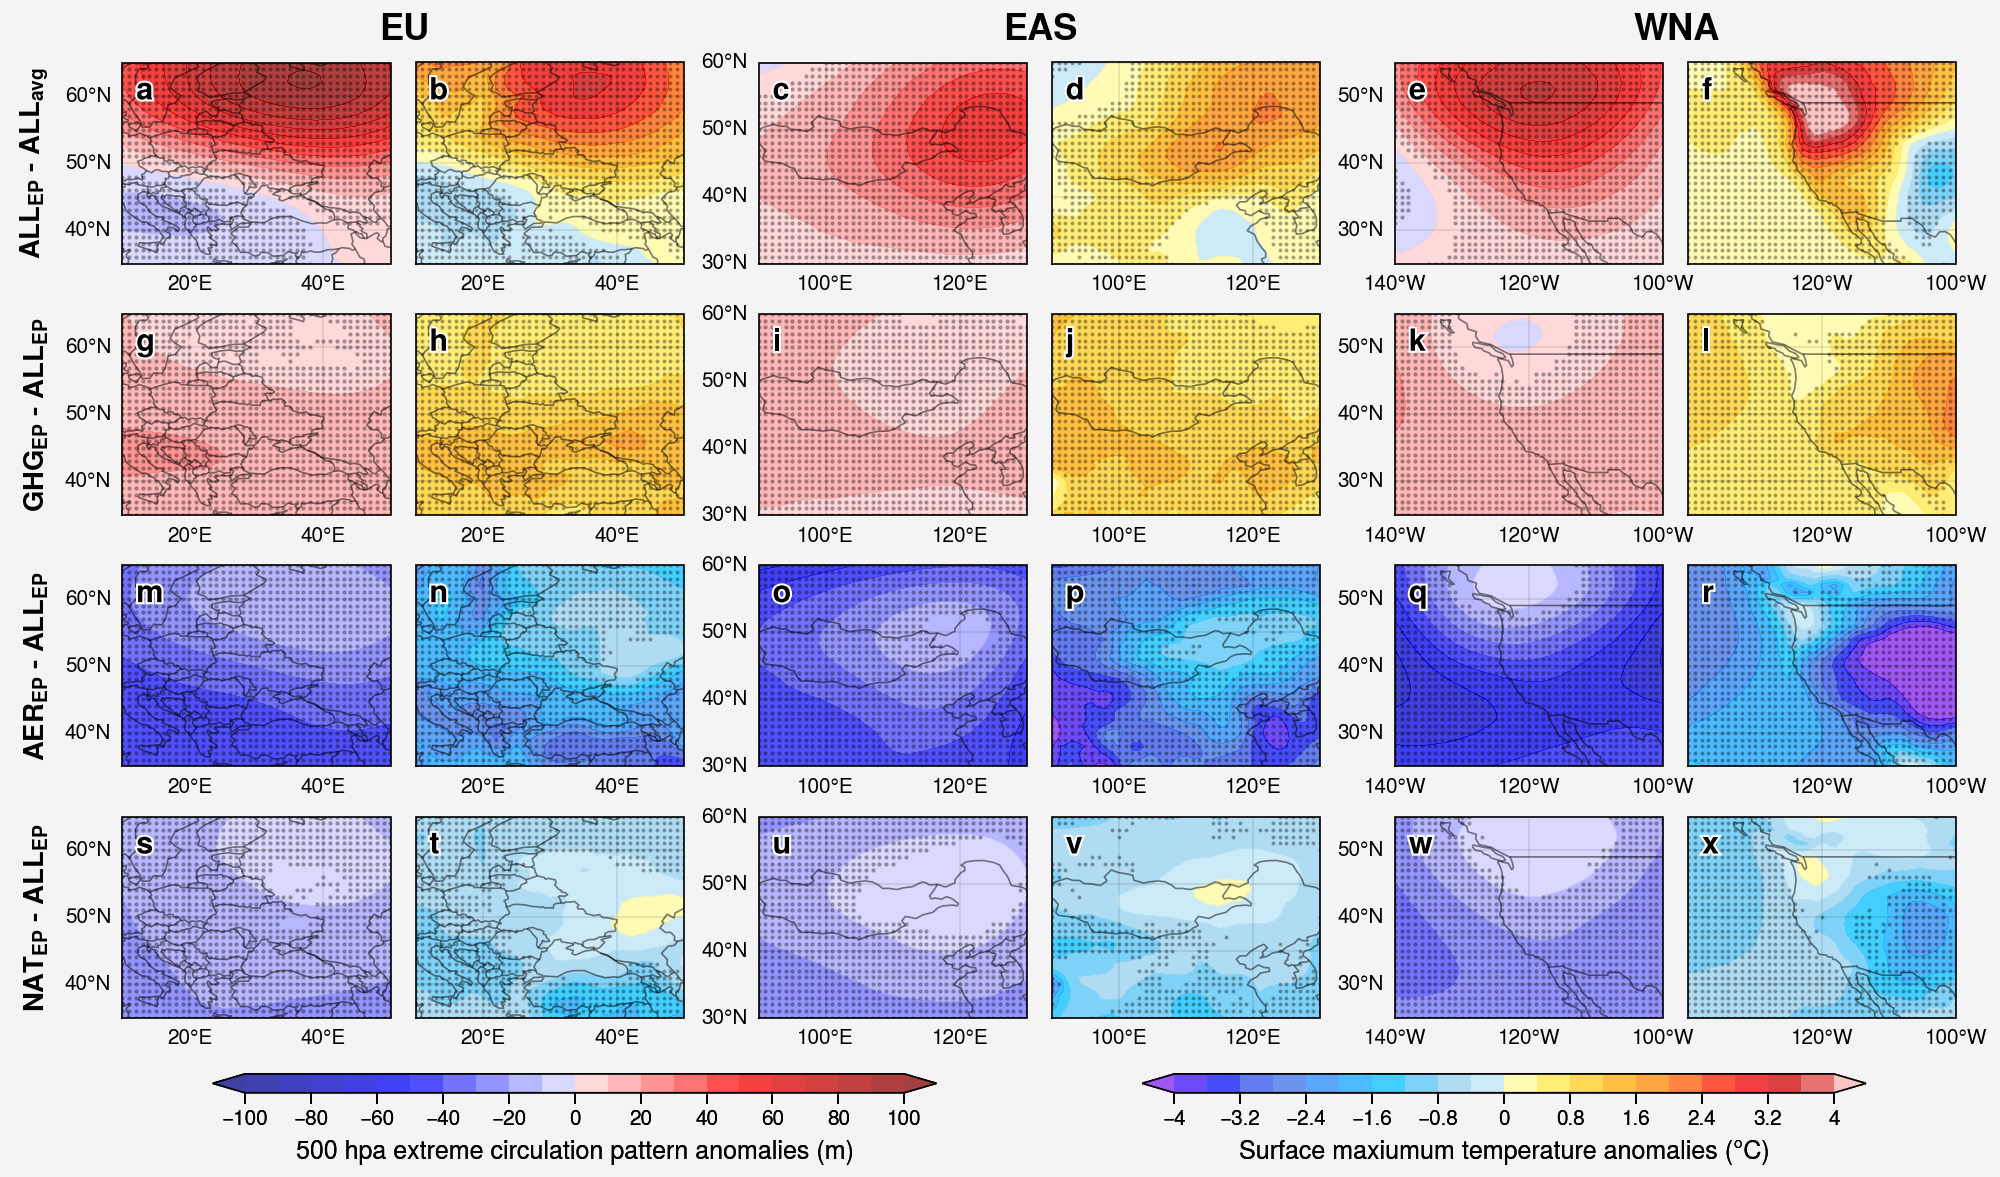

In [13]:
# only select extreme pattern for analysis
pplot.rc['coast.alpha'] = 0.5
pplot.rc['borders.alpha'] = 0.5
pplot.rc['grid.labelsize'] = 'small'
proj = pplot.Proj('pcarree', lon_0=180)
n_grid = 6
m_row = 4 # 4 rows
# regions = ['EU','EAS','WNA']
forcing = ['historical','hist-GHG','hist-aer','hist-nat']

fig, ax = pplot.subplots(
    ncols = n_grid, nrows = m_row,wspace=(1,3,1,3,1),hspace=(2,2,2),sharey=False,sharex=True,
    proj=proj,width = 10)
levels_hgt = [-100 + 10 * i for i in range(21)]
levels_tmax = [-4 + 0.4 * i for i in range(21)]
cmap1 = cmaps.BlRe
cmap2=cmaps.ncl_default

## From left to right are, 500 hpa GPH anomalies, 850 hpa wind field anomalies,
## 250 hpa wind field anomalies, and JJA surface maximum temperature anomalies.
for c in range(6): # for each column
    if c == 0 or c == 2 or c == 4 : # for 500 hpa GPH anomalies
        if c == 0 :
            domain = 'EU'
        elif c == 2:
            domain = 'EAS'
        else:
            domain = 'WNA'
        for r in range(4): # for different anomalies under external forcings
            if domain == 'EU':
                patt = 1
            elif domain == 'EAS':
                patt = 2
            else:
                patt = 0
            if r == 0:
                hist_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/geopotential_height_pattern/hgt_average_historical_' + domain + '.nc'
                hist_avg = xr.open_dataset(hist_avg_path)['zg']
                hist_extr_patt_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/geopotential_height_pattern/hgt_patt' + str(patt+1) + '_average_historical_' + domain + '.nc'
                hist_extr_patt_avg = xr.open_dataset(hist_extr_patt_avg_path)['zg'][1:,:,:]
            else:
                hist_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/geopotential_height_pattern/hgt_patt' + str(patt+1) + '_average_'  + forcing[0] + '_' + domain + '.nc'
                hist_avg = xr.open_dataset(hist_avg_path)['zg'][1:,:,:]
                hist_extr_patt_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/geopotential_height_pattern/hgt_patt' + str(patt+1) + '_average_'  + forcing[r] + '_' + domain + '.nc'
                hist_extr_patt_avg = xr.open_dataset(hist_extr_patt_avg_path)['zg'][1:,:,:]
            hist_ano = hist_extr_patt_avg - hist_avg
            hist_ano_mean = hist_ano.mean(dim='Dataset_run')
            hist_ano_sig = get_cmip_sig(hist_ano)
            lon = np.arange(domain_lonlat[domain]['lon_min'],domain_lonlat[domain]['lon_max']+1,1)
            lat = np.arange(domain_lonlat[domain]['lat_min'],domain_lonlat[domain]['lat_max']+1,1)
            X2,Y2 = np.meshgrid(lon,lat)
            X2 = X2 * hist_ano_sig
            Y2 = Y2 * hist_ano_sig
            p1 = ax[r,c].contourf(lon,lat,hist_ano_mean,levels = levels_hgt, alpha=0.75, extend = 'both',cmap=cmap1)
            ax[r,c].scatter(X2,Y2,s=1,c='black',alpha=0.25)
            ax[r,c].format(lonlim=(lon[0]-0.01,lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                            coast=True, borders=True, latlabels=True, lonlabels=True, lonlines=20, latlines=10)
    
    else: # 
        if c == 1 :
            domain = 'EU'
        elif c == 3:
            domain = 'EAS'
        else:
            domain = 'WNA'
        for r in range(4): # for different anomalies under external forcings
            if domain == 'EU':
                patt = 1
            elif domain == 'EAS':
                patt = 2
            else:
                patt = 0
            if r == 0:
                hist_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/maximum_temperature_pattern/tmax_average_historical_' + domain + '.nc'
                hist_avg = xr.open_dataset(hist_avg_path)['tasmax']
                hist_extr_patt_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/maximum_temperature_pattern/tmax_patt' + str(patt+1) + '_average_historical_' + domain + '.nc'
                hist_extr_patt_avg = xr.open_dataset(hist_extr_patt_avg_path)['tasmax'][1:,:,:]
            else:
                hist_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/maximum_temperature_pattern/tmax_patt' + str(patt+1) + '_average_'  + forcing[0] + '_' + domain + '.nc'
                hist_avg = xr.open_dataset(hist_avg_path)['tasmax'][1:,:,:]
                hist_extr_patt_avg_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/maximum_temperature_pattern/tmax_patt' + str(patt+1) + '_average_'  + forcing[r] + '_' + domain + '.nc'
                hist_extr_patt_avg = xr.open_dataset(hist_extr_patt_avg_path)['tasmax'][1:,:,:]
            hist_ano = hist_extr_patt_avg - hist_avg
            hist_ano_mean = hist_ano.mean(dim='Dataset_run')
            hist_ano_sig = get_cmip_sig(hist_ano)
            lon = np.arange(domain_lonlat[domain]['lon_min'],domain_lonlat[domain]['lon_max']+1,1)
            lat = np.arange(domain_lonlat[domain]['lat_min'],domain_lonlat[domain]['lat_max']+1,1)
            X2,Y2 = np.meshgrid(lon,lat)
            X2 = X2 * hist_ano_sig
            Y2 = Y2 * hist_ano_sig
            p2 = ax[r,c].contourf(lon,lat,hist_ano_mean,levels = levels_tmax, alpha=0.75, extend = 'both',cmap=cmap2)
            ax[r,c].scatter(X2,Y2,s=0.8,c='black',alpha=0.25)
            if c != 0 and c != 2 and c != 4:
                ax[r,c].format(lonlim=(lon[0],lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                                coast=True, borders=True, latlabels=False, lonlabels=True, lonlines=20, latlines=10)
            else:
                ax[r,c].format(lonlim=(lon[0]-0.01,lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                                coast=True, borders=True, latlabels=True, lonlabels=True, lonlines=20, latlines=10)

ax.format(
        abc = 'a', abcloc='ul', abcsize=11, leftlabels = ('$ALL_{EP}$ - $ALL_{avg}$','$GHG_{EP}$ - $ALL_{EP}$','$AER_{EP}$ - $ALL_{EP}$','$NAT_{EP}$ - $ALL_{EP}$'))
fig.colorbar(p1,loc='b',width='0.75em',length=0.8,col=(1,3),label='500 hpa extreme circulation pattern anomalies (m)')
fig.colorbar(p2,loc='b',width='0.75em',length=0.8,col=(4,6),label='Surface maxiumum temperature anomalies (°C)')
ax[0].text(1.05,1.25,s='EU',horizontalalignment='center',verticalalignment='top',transform = ax[0].transAxes,fontweight='bold',fontsize=13)
ax[2].text(1.05,1.25,s='EAS',horizontalalignment='center',verticalalignment='top',transform = ax[2].transAxes,fontweight='bold',fontsize=13)
ax[4].text(1.05,1.25,s='WNA',horizontalalignment='center',verticalalignment='top',transform = ax[4].transAxes,fontweight='bold',fontsize=13)
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/Hwdna_figure_res/'
fig.save(fig_dir + 'FigS12_circulation_anomalies_under_external_forcings.pdf')